# $ \color{blue}{\text{EJERCICIO 1}} $
## $ \color{blue}{\text{Ítem d}} $

$$ x\left( nT \right) \overset{T_k}{\longrightarrow} x\left( \left( n-k \right) T \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( \left( n-k \right) T \right) $$
$$ x\left( nT \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( nT \right) \overset{T_k}{\longrightarrow} 5 \cdot \left( n-k \right)T \cdot x^2\left( \left( n-k \right)T \right) $$

Hay diferencias $ \implies $ **No es invariante**.

$$ \\ $$

Dadas $ x_1(n) $ y $ x_2(n) $ tal que:
$$ x_1(nT) = x_2(nT) \quad \forall n \leq k $$
$$ x_1(nT) \neq x_2(nT) \quad \forall n>k $$
$$ \left. {T\left[ x_1(nT) \right]} \right|_{n=k} = 5 \cdot kT \cdot x_1^2(kT) = 5 \cdot kT \cdot x_2^2(kT) = \left. T\left[ x_2(nT) \right] \right|_{n=k}$$

$ \implies $ **Es causal**.

$$ \\ $$

Dada $ x(nT) = \alpha x_1(nT) + \beta x_2(nT) $:
$$ T\left[ x(nT) \right] = 5 \cdot nT \cdot \left( \alpha x_1(nT) + \beta x_2(nT) \right)^2 $$
$$ \alpha T\left[ x_1(nT) \right] + \beta T\left[ x_2(nT) \right] = \alpha \cdot 5 \cdot nT \cdot x_1^2(nT) + \beta \cdot 5 \cdot nT \cdot x_2^2(nT) $$

Son distintos $ \implies $ **No es lineal**.

# $ \color{blue}{\text{EJERCICIO 9}} $
![title](Resources/EJ9/ej9_system.png)

<br>

Se simulará la siguiente ecuación en diferencias, que se extrae del diagrama anterior:
$$ y(nT) = \frac{1}{2} \cdot x\left( (n-2)T \right) + \alpha \cdot y\left( (n-1)T \right) + \alpha \cdot y\left( (n-2)T \right) $$

<br>

El cociente que será utilizado para generar el filtro mediante *scipy.signal* es:
$$ \frac{\frac{1}{2} \cdot z^{-2}}{1 - \alpha \cdot z^{-1} - \beta \cdot z^{-2} } $$

Dado que no se especifica, se toma que el sistema se encuentra originalmente relajado.

In [10]:
import scipy.signal as ss
import matplotlib.pyplot as plt
import numpy as np

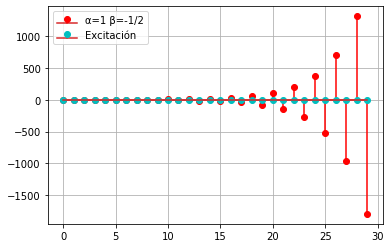

In [28]:
delta = ss.unit_impulse(30)
alpha = [1, 1/2, 5/4]
beta = [-1/2, -1/8, -25/32]
responses = []

for i in range(3):
    b = [0, 0, 1/2]
    a = [1, alpha[i], beta[i]]
    y = ss.lfilter(b, a, delta)
    responses.append(y)


plt.stem(np.arange(0, 30), responses[0], 'r', label='α=1 β=-1/2', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()

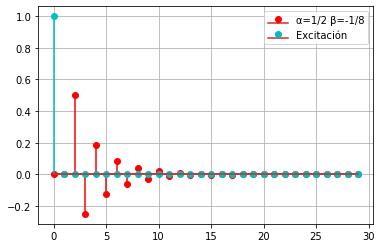

In [29]:
plt.stem(np.arange(0, 30), responses[1], 'r', label='α=1/2 β=-1/8', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()

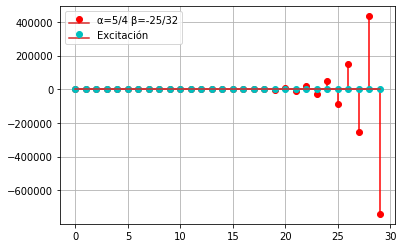

In [30]:
plt.stem(np.arange(0, 30), responses[2], 'r', label='α=5/4 β=-25/32', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()